# Introduksjon
I denne oppgaven skal vi simulere bruken av protonstråling som behandlig av kreft celler. Disse protonene blir først akselerert i en cyclotron for så å bli skutt inn i kroppen mot kreft cellene. Målet vårt er å se på hvor mye spenning som må til i cyclotronen for å kunne behandle en svulst, avhengig av hvor i kroppen den sitter. Med denne typen stråling er det mulig å stråle en kreft celle uten at man får for mye stråling på friske organer rundt, som gjør dette til en atraktiv behandlings metode. 

# Bakgrunn
I første fase befinner protonet vi ser på seg i cyclotronen. Her blir de akselerert av et elektrisk felt og satt i sirkelbevegelse av et magnetisk felt. Protonet beveger seg da i sirkelbaner her til den har nok fart og slipper ut. Protonene som brukes i behandlig av kreft har et energi nivå fra < 100 Mev (mega elektron volt) (lav energi) til >150 Mev (høy energi). Når protonene slipper ut blir de skutt som stråling mot det aktuelle stedet på kroppen. Etter at protonet har forlatt cyclotronen ser vi på fase 2, hvordan protonet beveger seg inne i kroppen. På grunn av tettheten til vevet i kroppen vil portonet bremses og i denne prosessen frigjøre energi. Målet er å kunne tilpasse hastigheten til protonene slik at de slipper ut energien på riktig sted i kroppen, altså der svulsten sitter.

# Mål
Målet med forsøket er å undersøke hvor mye spenning som trengs for å akselerere protonene opp til en nødvendig hastighet. Vi ønsker å se på dette i sammenheng med hvor i kroppen kreft svulsten sitter. For å kunne gjennomføre dette har vi måttet foreta noen forenklinger av problemet og systemet. Selv om modellen vår for cyclotronen fungerer godt er dette en forenklet modell. Vi måtte også forenkele modellen for hvordan protonet frigjør energi i kroppen. Denne modellen er blandt annet avhengig av tettheten i vevet, men siden dette varierer veldig fra hvor i kroppen vi skal stråle og fra person til person måtte vi foreta noen forenkliger her. Til tross for disse og andre forenkliger har vi prøvd å få så nøyaktige resultater som mulig, men disse forenkligene vi nok ha påvirket resultatene vi fikk. 

# Fase 1:

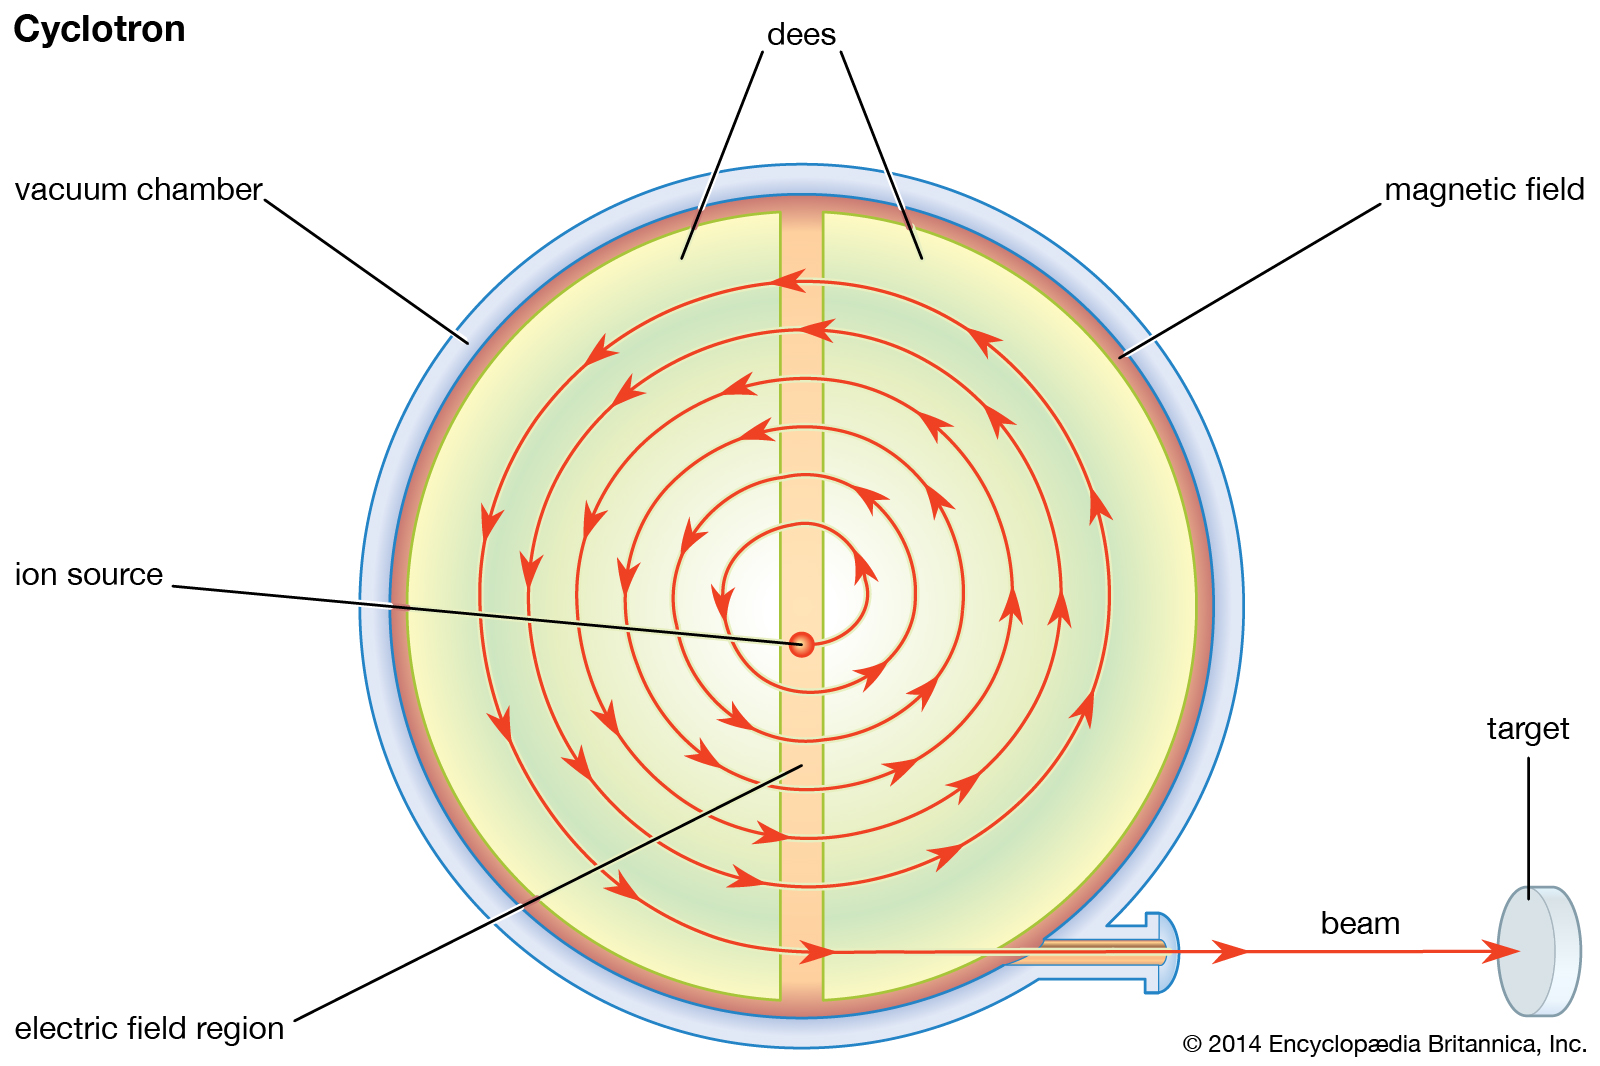
(hentet fra https://www.britannica.com/technology/betatron)

Det første vi må gjøre er å lage en modell som simulerer hvordan protonet vil få en hastighet i cyclotronen. Som vi ser av figur 1 er protonet alltid påvirket av et magnetisk felt som gjør at det beveger seg i sirkeler. I korte områder er protonet også innen for et elektrisk felt som aksellererer det, dette feltet skifter retning slik at det alltid virker med bevegelseretningen til protonet, slik at det oppnår maksimal hastigeht. Frekvensen denne skifter med vil være gitt ved: 

$w_{cyclotron} = \frac{qB}{m}$. (Dette ble utleedet i start eksempelet for cyclotronen) (1)

Vi vet da at den magnetiske kraften alltid virker på protonet og den elektriske virker når det er innen for det relevante området. Vi kan dermed finne aksellerasjonen til protonet inne i cyclotronen:

$F_{mag} = qv\times B$, (2) der q er ladningen til protonet, v er hastigheten og B er det magnetiske feltet. B er her satt til 1.5T (i z retning) som er en vanelig verdi i slike cyclotroner. 

Hvis protonet er innen for det elektriske feltet virker det også en elektrisk kraft:

$F_{el} = qEcos(w_{cyclotron}t)$, (3) der E er det elektriske feltet og t er tidspunktet. 

Det elektriske feltet, E, vil være gitt av spenningen som er målet vårt å finne.

$E = \frac{V}{d}$, (4)

Med disse utrykkene for kreftene kan vi bruke Newtons 2. lov til å finne aksellerasjonen til protonet.

$a = \frac{\Sigma F}{ m} = \frac{qv\times B + qEcos(w_{cyclotron}t)}{m}$, hvis protonet befinner seg utenfor det elektriske feltet bidrar bare den magnetiske kraften til aksellerasjonen. 

Med denne aksellerasjonen kan vi oppdatere protonets hastighet og posisjon ved bruk av Euler - Cromers metode. Slik kan vi simulere protonets bevegelse inne i cyclotronen. Koden som  foretar denne simuleringen ser slik ut (denne koden ble også gitt i start eksempelet for cyclotronen): 

In [2]:
import sympy as sy
import numpy as np
import matplotlib.pyplot as plt


q = 1.6*10**(-19) #ladning til proton
m = 1.67*10**(-27) # masse til proton
# V = spennning mellom platene, det er denne vi vil å finne
d = 90*10**(-6) #avstanden mellom platene i akseleratoren
c = 299792458 #lyses hastighet

def E(voltage):
    return(voltage/d)

B = np.array([0.0, 0.0, 1.5]) #magnetisk felt i z retning, 1.5T. Skal jeg forandre på denne?
r_cyclotron = 0.05 #radius på 5 cm


w = q*np.linalg.norm(B)/m

t = 0 #start tid
dt = 5*10**(-12) #tidssteg, kan være vi må øke denne til 5 pico sekund.


def cyclotron(E):
    particle_pos = np.array([0.0, 0.0, 0.0]) #posisjon til protonet i utgangspunktet
    particle_v = np.array([0.0, 0.0, 0.0]) #start hastigheter

    particle_pos_x = [particle_pos[0]]
    particle_pos_y = [particle_pos[1]]

    t = 0

    while (np.linalg.norm(particle_pos) < r_cyclotron): #loop så lenge protonet er inne i akseleratoren

        Fnet = np.array([0.0, 0.0, 0.0]) #kraftvektor på partikkelen her

        if np.absolute(particle_pos[0]) < d/2: #hvis partikkelen er mellom de to D - ene beregner vi den elektriske kraften
            Fnet[0] = q*E*np.cos(w*t)
        else: #hvis partikkelen ikke er innen for det elektriske feltet virker bare den magnetiske kraften
            Fnet = q*np.cross(particle_v, B)


        particle_v = particle_v + Fnet*dt/m #oppdaterer hastigheten
        particle_pos = particle_pos + particle_v*dt #bruker hastighet til å oppdatere posisjon.

        particle_pos_x = np.append(particle_pos_x, particle_pos[0])
        particle_pos_y = np.append(particle_pos_y, particle_pos[1])
        t = t + dt
    return(particle_pos_x, particle_pos_y, particle_v, np.linalg.norm(particle_v))


Vi kan nå teste cyclotronen med en tilfeldig spenning for å se om dette gir en fornuftig bevegelse: 

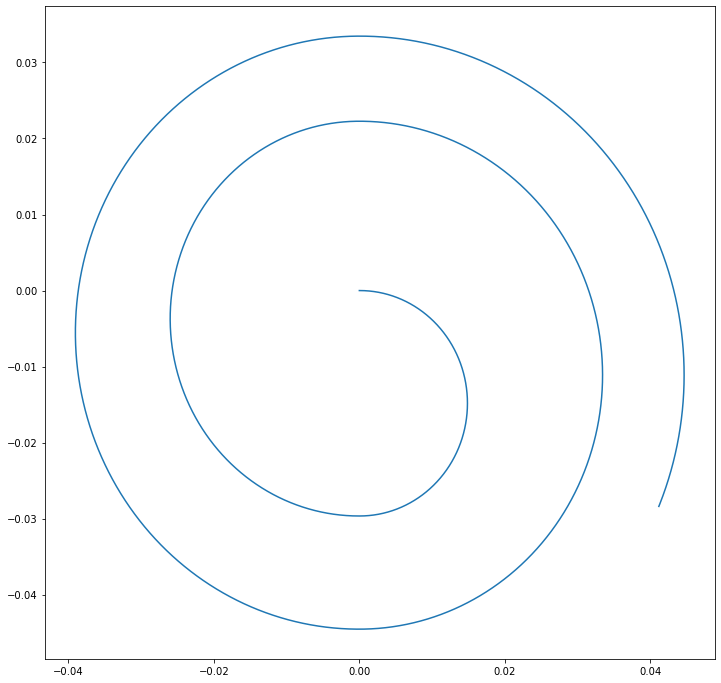

In [3]:
position_x, position_y, v, v_max = cyclotron(E(50000))

plt.figure(figsize=(12,12))
plt.plot(position_x, position_y)
plt.show()


Som vi ser beveger protonet seg i sirkel bevegelser til den slipper ut.

# Fase 2: Kroppen
Protonet har nå blitt skutt ut av cyclotronen med en hastighet og kinetisk energi. Denne kinetiske energien er gitt ved:

$E_k = \frac{1}{2}mv^2$, (5)

Der m er massen til protonet og v er hastigheten. Vi ønsker nå at denne energien skal bli frigjort ved svulsten og ikke andre steder i kroppen. Hvis energien fra protonet blir firgjort på feil sted i kroppen vil dette føre til skader på andre, friske organer. Ved relativistiske beregninger (for lange til å vise her, vist i: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4407514/#!po=8.00712) har man funnet ut at protonet mister energi omvent proposjonalt med hastigheten i andre, dette skyldes Columbske interaksjoner med atomene (elektronene tar opp energi fra protonet og slipper ut denne energien lokalt) i vevet.

$E_{tap} = A\cdot \frac{1}{v^2}$, (6) der A er en konstant. (Hentet fra http://doi.org/10.1063/1.1522215))

Konstanten A vil variere med tettheten til materialet vi ser på. Dette er vannskelig å finne en god og samtidig enkel modell for siden tettheten varierer veldig. Tettheten i bein er mye høyere en f.eks. luften i lungene. For å finne denne måtte vi prøve og feile oss frem til et resultat som virket litt troverdig. Vi startet med tettheten til vann ($997 kg/m^3$) som en tilnærming siden kroppen består av mye vann, dette ga passe gode resultater. Senere fant vi tettheten til muskelvev ($1060 kg/m^3$) og vanelig bein tetthet ($1900 kg/m^3$) og kom frem til å bruke en A som lå et sted i dette området (men nærmere muskelverdien siden strålingen mest sansynelig går igjennom mest av dette). Vi ente med å bruke A = $1200kg/m^3$. I virkelige behandliger kan man måle variasjonene i tettheten ved bruk av ct - skanning som et nøyaktig bilde og bedere beregninger. Disse tetthetene kan variere fra bein som er det tetteste til lufta i lungene som gir minst motstand. 

Fra formelen for energitap ser vi at jo saktere protonet beveger seg jo mer energi blir frigjort. Vi ønsker derfor å finne en utgangs hastighet fra cyclotronen slik at protonet sakker av og fra gir seg mesteparten av dosen ved svulsten. 


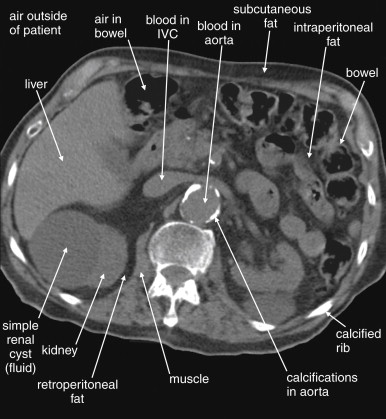
Eksempel på en ct skanning av kroppen (hentet fra https://www.sciencedirect.com/topics/medicine-and-dentistry/hounsfield-scale). Tettheten i vevet vil variere fra hvilke organer vi ser på og hvor mye bein vi må igjennom. Disse tetthetsvariasjonene påvirker energitapet til protoenet.

Nå som vi har et utrykk for hvordan protonet mister energi kan vi bruke dette til å finne hvor mye energi den har igjen og så den nye hastigheten ut ifra dette ved å kombinere formel 5 og 6:

$E_{n + 1} = E_n - E_{loss}$

$\frac{1}{2}mv_{n + 1}^2 = \frac{1}{2}mv_{n}^2 - A\frac{1}{v_n^2}$

$\Rightarrow v_{n + 1} = \sqrt{\frac{2(E_k - E_{loss})}{m}} = \sqrt{v_n^2 - \frac{2A}{mv_n^2}}$, (7)

Med dette utrykket for hvordan hastigheten til protonet forandrer seg kan vi beregne hvordan det kommer til å bevege seg i kroppen med vært tidssteg dt (= $5 \cdot 10^{-12}$), nesten som i Eulers metode. På denne måten kan vi simulere hvordan protonet kommer til å bevege seg igjennom kroppen og gi fra seg energi underveis. Funksjonen som gjør denne beregningen ser slik ut:  

In [4]:
def tissue(v_0, A = 1200): #funksjon som beregner protonenes bevegelse i kroppen, og tar starthastigheten ut fra cyclotronen som argument.
    v = v_0
    p_b = [0] #liste med protones posisjon i kroppen
    E_given = [0] #liste med energi utslipp fra protonet
    while v > 0: 
        E_k = 0.5*m*v**2
        E_loss = A*(1/v**2) #Muskeler har tetthet på 1060 kg/m^3, vil bruke litt høyere siden vi også skal igjennom bein med masse tetthet 1900 kg/m^3.
        if E_loss > E_k: #protonet kan ikke gi fra seg mer energi enn det har, bryter derfor funksjonen hvis dette skjer. 
            break
        E_given.append(E_loss)
        p_b.append(p_b[-1] + v*dt) #oppdaterer posisjonen i kroppen med hastigheten og tidssteget dt. 
        v = np.sqrt((2*(E_k - E_loss))/m) #ny hastighet
    p_b = np.array(p_b)
    E_given = np.array(E_given)
    return(p_b, E_given) #returnerer arrayer med bevegelse i kroppen og energiutslipp


Med de to arrayene som funksjonen returnerer kan vi plotte hvordan protone fra gir seg energi innover i kroppen. Siden energitapet er gitt ved formel 6 burde dette plottet vise en såkalt Bragg Peak. Altså en topp mot slutten når hastigeten til protonet blir lav, og energi utslippet høyt. Et eksempel på en slik kurve er:

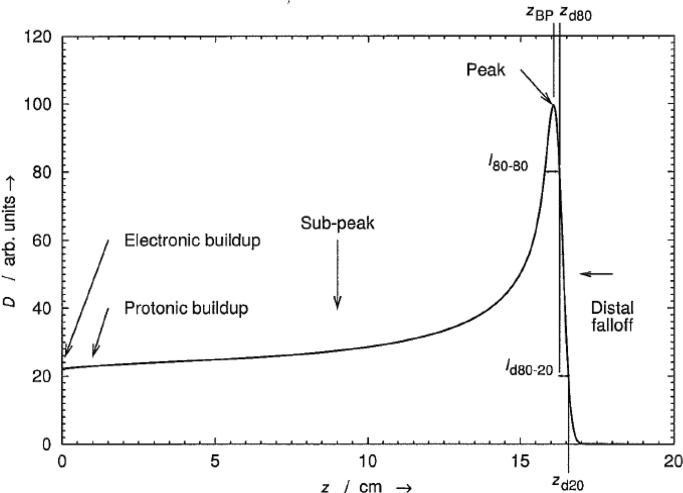
Her vises energiutslippet fra et proton med energi på 154 Mev i vann. (bildet er hentet fra https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4407514/#!po=8.00712)

Nå som vi har en modell for hvordan protonet beveger seg i kroppen gjennstår det bare å lage en funksjon som løser problemstillingen vår. Jeg vil at denne funksjonen skal kunne ta inn hvor dypt i kroppen man vil stråle og returnere den nødvendige spenning til cycotronen. 

For å gjøre dette skriver vi en funksjon som tar inn dybden vi vil stråle i. Funksjonen tester så flere mulige spenninger og bruker de tidligere funksjonene til å regne ut hvor langt inn i kroppen protonet er når den gir fra seg mest energi. Vi fant spenningsintervallet ved å teste funksjonen med forskjellige dybder til v fant et intervall som dekket de fleste. Funksjonen finner den spenningen som gir oss protonet som frigjør mest energi nærmest mulig den ønskede dybden. Til slutt plotter funksjonen hvordan dette protonet slipper ut energi på vei inn mot svulsten. Programmet med denne funksjonen ser slik ut:

In [5]:
def case(Depth, Method):
    voltage = np.linspace(1.7*10**7, 4*10**7, 10000) #spennings intervall vi ser på
    Field = E(voltage) #bruker E funksjonen til å finne det elektriske feltet for hver spenning
    hit = 10
    for e in Field:
        x, y, v, v_max = cyclotron(e) #finner hastigheten protonet får ut av cyclotronen i hvert tilfelle
        if v_max > c: #protonet må ikke gå fortere enn lysets hastighet
            print("Over the speed of light")
            break
        p_b, E_given = Method(v_max) #finner energi utslipp og posisjon i kroppen i hvert tilfelle
        n = np.argmax(E_given)
        point = p_b[n] #finner hvor i kroppen protonet er når det frigjør mest energi
        if abs(Depth - point) < abs(Depth - hit): #finner den spenningen som gir nærmest treff
            hit = point
            dose = max(E_given)
            V = float(voltage[np.where(Field == e)])
            E_0 = 0.5*m*v_max**2*(6.24150913*10**12) #finner energien protonet har når den blir skutt ut

    position_x, position_y, v, v_max = cyclotron(E(V)) #plotter protonets bevegelse i cyclotronen for den beste spenningen
    plt.figure(figsize=(12,12))
    plt.plot(position_x, position_y)
    plt.show()

    p_b, E_given = tissue(v_max) #plotter protonets bevegelse i kroppen
    plt.plot(p_b, E_given)
    plt.show()
    print(v_max) #printer utgangs hastigheten til protonet
    return(hit, dose, V, E_0) #returnerer hvor i kroppen protonet slipper ut mest energi, hvor mye energi den slipper ut, spennigen i cyclotronen og energien protonet har i starten

Jeg har også lyst til å lage en graf som viser spenning i forhold til hvor langt inne i kroppen vi er. For å gjøre dette må jeg forandre litt på case funkjsonen slik at den ikke plotter alle grafene hver gang, så kn vi kjøre denne med forskjellige dybdre og plotte den nødvendige spenningen. Den andre utgaven av funksjonen ser slik ut:

In [6]:
def case_2(Depth, Method): #lager ikke plottene
    voltage = np.linspace(1.7*10**7, 4*10**7, 10000) #spennings intervall vi ser på
    Field = E(voltage) #bruker E funksjonen til å finne det elektriske feltet for hver spenning
    hit = 10
    for e in Field:
        x, y, v, v_max = cyclotron(e) #finner hastigheten protonet får ut av cyclotronen i hvert tilfelle
        if v_max > c: #protonet må ikke gå fortere enn lysets hastighet
            print("Over the speed of light")
            break
        p_b, E_given = Method(v_max) #finner energi utslipp og posisjon i kroppen i hvert tilfelle
        n = np.argmax(E_given)
        point = p_b[n] #finner hvor i kroppen protonet er når det frigjør mest energi
        if abs(Depth - point) < abs(Depth - hit): #finner den spenningen som gir nærmest treff
            hit = point
            dose = max(E_given)
            V = float(voltage[np.where(Field == e)])
            E_0 = 0.5*m*v_max**2*(6.24150913*10**12) #finner energien protonet har når den blir skutt ut
    return(hit, dose, V, E_0) #returnerer hvor i kroppen protonet slipper ut mest energi, hvor mye energi den slipper ut, spennigen i cyclotronen og energien protonet har i starten

Vi kan nå kjøre denne "case" med et test eksempel. La oss si at vi vil stråle et punkt som ligger 3 cm inn i kroppen. Vi bruker også "case_2" for å lage et plot av nødvendig spenning og dybde i kroppen. Vi kaller da på funksjonene og får følgende resultat: 

# Resultater

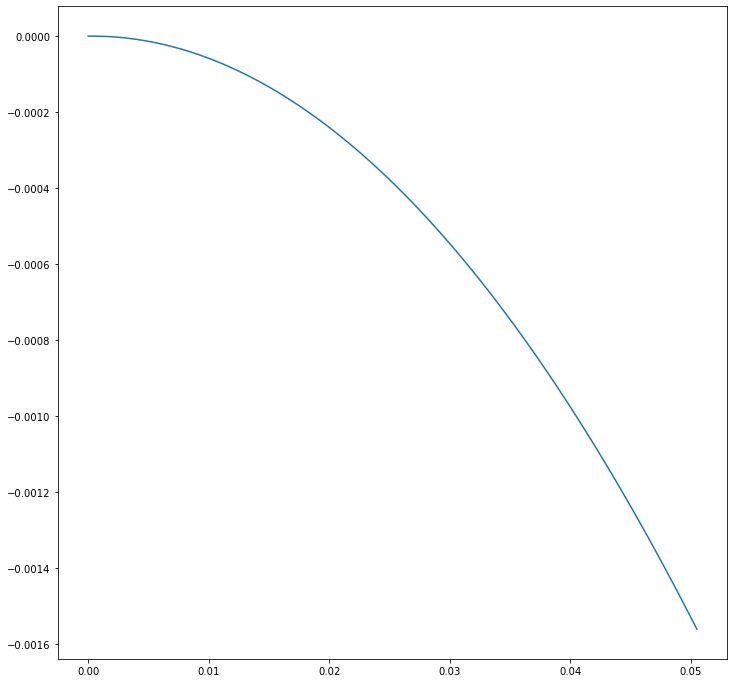

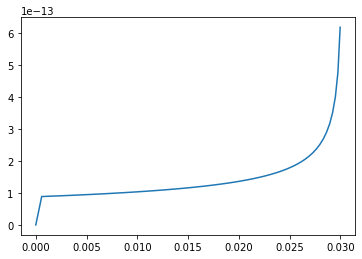

116174941.73439506
0.029967670358790634 6.193524145924437e-13 21825882.588258825 70.3397810750898


In [7]:
hit, dose, V, E_0 = case(0.03, tissue)

print(hit, dose, V, E_0)

Det første plottet viser protonets bevegelse i cyclotronen. Vi ser her at spenningen er så stor at protonet beveger seg ut nesten med en gang, uten å foreta en full sirkel. Det neste plottet viser protonets energi utslipp i kroppen. Vi ser at utslippet er lavt helt til det nærmer seg 3.0 cm. Da når protonet lav nok hastighet til å slippe ut meste parten av energien sin. Det første tallet etter plottet er hastigheten protonet har når det forlater cyclotronen. Vi ser at denne hastigheten er på ca. $1.2 \cdot 10^8 m/s$. Dette kan være et problem med tanke på at vi hovedsakelig har regnet klassisk og ikke relativistisk. 

Det neste tallet viser hvor langt inn i kroppen vi traff. Siden målet vårt var 3.0 cm ser dette relativt bra ut. Det neste tallet er energien som protonet gir i dette punktet. Det siste tallet er hvor mye energi protonet har når det kommer ut fra cyclotronen, altå 70 Mev. Det er mulig å behandle kreft med protoner i dette energi området, men de blir regnet for å være lav energi. Det fjerde tallet var det vi lette etter, spenningen i cyclotronen. Vi ser at denne er på ca. $2.18 \cdot 10^7$ volt. Dette er ganske mye, i partikkel akselleratorer (ikke cyclotroner) bruker mann opp til $10^6$. Overskrider man dette blir det fort en fare for gjennomslag.  

Vi lager så kurven med spenning mot dybde i kroppen:



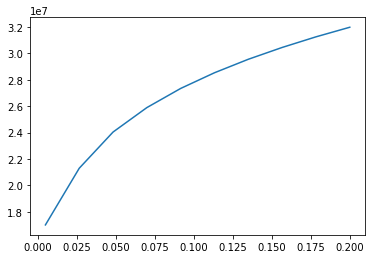

In [8]:
u = []
for i in np.linspace(0.005, 0.2, 10): #plotter nødvendig spenning for en dybde mellom 5 mm og 20 cm
        hit, dose, V, E_0 = case_2(i, tissue)
        u.append(V)
plt.plot(np.linspace(0.005, 0.2, 10), u)

Fra dette plottet ser vi at det kreves ca. $1.5 \cdot 10^7$ volt for å stråle 5 mm inn i kroppen, og ca. $3.2 \cdot 10^7$ for å stråle 20 cm inn i kroppen.

# Analyse, forenklinger og feilkilder
Vi ser at resultatene vi fikk av simuleringen vår passer greit, men de er ikke ideele. Det enkleste problemet å rette på er hvor vi traff. Vi ser at vi bommer litt på målet vårt på 3.0 cm. Ved å ta flere verdier innen for spennings intervallet vårt kan vi få mer nøyaktige beregninger og bedre treff. Den eneste begrensningen er datamaskinen som gjør beregningene, jo flere verdier vi sjekker hvor lengre tid tar testen. 

Vi ser også at hastigheten til protonet er veldig høy. Med en hastighet opp i $1.2 \cdot 10^8$ har vi garantert en relativistisk effekt på partikkelen. Jeg prøvde å implementere en kode som tok dette med i beregningene, men resultatet av denne ga ingen fornuftige svar eller frigjorde all energien innen den første millimeteren. Dette skyldes mest sannsynelig menneskelige feil i koding og løsning. Til tross for denne høye hastigheten får protonet en realistisk energi ut av cyclotronen, noe som tyder på at hastigheten vi har funnet er i rikig størrelse orden. 

Til slutt er det spenningen. Den virker for stor ut ifra hva man skulle tro. særlig når vi sammenlikner den med det som brukes i parikkel akselleratorer (som bruker høyere spenning enn en cyclotron). Dette kan tyde på en feil i løsningen vår. Jeg undersøkte muligheten å øke det magnetiske feltet. Dette kunne ha ført til at protonet forble lengre i cyclotronen og dermed kunne oppnå samme hastighet med et lavere elektrisk felt. Men for ferro magnetiske elektromagneter er dette feltet begrenset til ca. 2 T, og å øke B fra 1.5 T til 2 T ga så godt som ingen utslag på resultatene. Derfor virker det som om vi ikke kan forandre på B feltet for å senke den nødvendige spenningen. 

Konstanten A som vi bruker til å skalere energitapet er også en mulig feilkilde. Energitapet er i Joule, men vi får ikke dette ved å ta $\frac{kg}{m^3}\frac{s^2}{m^2}$. A skal være avhengig av tetthet, men nødvedningvis også noen andre faktorer som jeg ikke fant slik at enhetene stemmer. Vi kan kjøre Tiusse funksjonen med A = 997 som er tetthetn til vann, og $v_{max} = 171732148 \Rightarrow E_0 = 154Mev$ (ved formel 5)  og sammenlikne dette med fig 4.

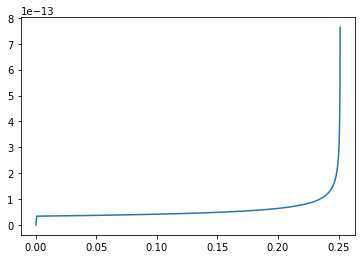

In [9]:
P, R = tissue(171732148, 997)
plt.plot(P, R)
plt.show()

Hvis vi sammenlikner denne kurven med fig 4 ser vi at protonet vårt kommer ca 8 cm for langt før den slipper løs mesteparten av energien sin. Dette tyder på at når vi bruker A lik tettheten til materialet, er dette for lite motstand. Dette vil også ha påvirket resultatene av kreft strålinga til en viss grad. 

En annen ting å merke seg er at vi kun har løst problemet i 2D. Vi trenger derfor kun å tenke på at protonet skal frigjøre energien i riktig dybde i mennesket. I virkeligheten er det mye vanskeligere å treffe punktet man ønsker. På grunn av interaksjoner mellom atomene i det absorberende materialet og protonene oppstår det faktisk en compton spredning på protonene. Denne spredningen har ca. en Gauss fordeling med treffpunktet som gjennomsnitt. Man må derfor i virkelig stråling ta hensyn til denne compton spredningen når man skal behandle, slik at man ikke skader friske organer rundt svulsten. Dette er et element vi ikke har måtte ta høyde for å vår 2D løsning av problemet. 

# Konklusjon
Jeg vil si at forsøket stortsett var vellykket. Vi har klart å skrive et program som beregner den nødvendige spenningen for å stråle ett bestemt sted i kroppen. Jeg har også fått en bedre forståelse av hvordan protonstråling fungerer og hva som er viktig å ta hensyn til. Vi må innrømme at noen av forenklingene våre helt klart har påvirket resultatene våre. Jeg tror utelatelsen av å regne relativistisk, samt vår enkle modell for hvordan tettheten påvirker energien har hatt mest innvirkning på resultatene. Spenningen vi fikk virket alt for høy, men når vi ser på energien til protonet er denne i riktig størrelse orden. Det er derfor naturlig å tro at spenningen vi kom frem til stemmer (finnner dette lite sannsynelig) eller så finnes det en annen måte å få protonet opp i riktig hastighet med mindre spenning. Til tross for disse avikene fra virkelige forsøk/ arbeid vil jeg si at forsøket vårt var vellykket siden vi klarte å lage en enkel modell og fikk en bedre forståelse av fenomenet/ problemet. 

# Kilder
Start eksempel Notebook: Cyclotron

https://en.wikipedia.org/wiki/Muscle

https://hypertextbook.com/facts/2002/AnnaYarusskaya.shtml

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4407514/#!po=8.00712

https://physicstoday.scitation.org/doi/10.1063/1.1522215

https://www.britannica.com/technology/betatron

https://www.sciencedirect.com/topics/medicine-and-dentistry/hounsfield-scale

https://en.wikipedia.org/wiki/Cyclotron